In [1]:
from fastai.basics import *
from fastai.gen_doc.nbdoc import *
from fastai.vision import *

In [2]:
'''
Так как целевые данные, которые мы используем в примере, обладают значениями {0,255}, а нам надо {0,1}
То надо их привести к нужному нам виду
Cам fastai не показывает, когда он вызывает функции аугментации на целевых и входных данных, но мы знаем что они отличаются количеством каналов, 1 для целевых и 3 для входных

Поэтому наш алгоритм для каждого обрабатываемого изображения, если кол-во каналов 1 (целевое изображение) делим целочисленно на 255, таким образом у нас будет матрица целочисленных чисел {0,1}
'''
def norm_y_(y):
    if y.shape[0] == 1:
        y = (y//255)
    return y
norm_y = TfmPixel(norm_y_)

_tfms = get_transforms()
tfms = [_tfms[0]+[norm_y()], _tfms[1]+[norm_y()]]

In [19]:
data = (SegmentationItemList.from_folder(r'data\Images\Bricks')
       .split_by_rand_pct()
       .label_from_func(lambda path: path.parent.parent/'White'/f'white{path.stem[5:]}.png', classes=np.array(['Background','Block']))
       .transform(tfms, tfm_y=True)
       .databunch(bs=4, path='./temp/', num_workers=0)
       .normalize(imagenet_stats))

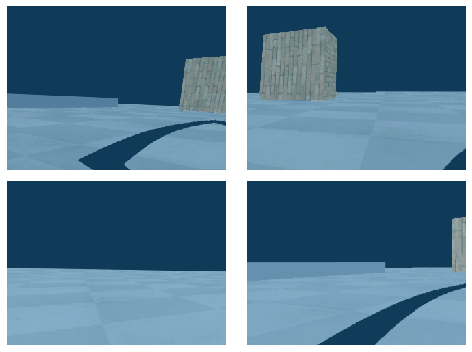

In [5]:
data.show_batch(rows=2, figsize=(7,5))

In [16]:
# Так как мы не настраивали толком процесс обучения, то может понадобится перезапустить процесс обучения несколько раз
# У меня без изменений кода максимум было .994 Dice
learn = unet_learner(data, models.resnet18, metrics=dice)
learn.fit_one_cycle(4,1e-4)
learn.save('mini_train')

epoch,train_loss,valid_loss,dice,time
0,0.134440,0.027603,0.840164,00:22
1,0.071627,0.005826,0.985974,00:22
2,0.035514,0.002704,0.994838,00:22
3,0.019504,0.002573,0.994753,00:23


In [ ]:
# Если хотите загрузить мою модель, сначала загрузите и поместите в папку temp/model
# Сама модель находится в папке с книгами, ссылка в дискроде
# learn.load('block_finder_res18_99')

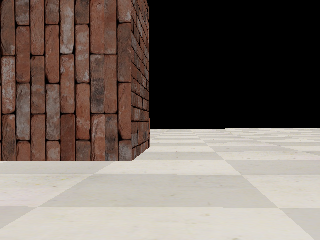

In [24]:
data.valid_ds[3][0]

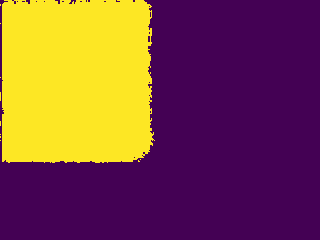

In [25]:
learn.predict(data.valid_ds[3][0])[0]